## Bank Customer Creditworthiness Prediction

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Correlation check
from scipy import stats
from scipy.stats import chi2_contingency
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Modeling
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from statsmodels.genmod.generalized_linear_model import GLM
from statsmodels.genmod import families
from statsmodels.graphics.regressionplots import influence_plot
from scipy.stats import skew

# Model evaluation
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_squared_error

In [2]:
data = pd.read_csv('dataset.csv')
data.head()

,local_ref_1,vn_marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
data.rename(columns={'local_ref_1':'gender', 'vn_marital_status':'marital_status'}, inplace=True)
data.head()

,gender,marital_status,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,...,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,loaikyhanJuin2021,sectorJuin2021,product_codeJuin2021
0,MALE,Married,27.0,262.0,9436.0,1992.0,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,MALE,Single,79.0,769.0,27097.0,1986.0,NaN,NaN,NaN,NaN,...,NaN,0.003666,0.006953,0.004128,1.0,21061.0,365.0,DH,1890.0,22321.0
2,MALE,Married,1.0,250.0,8989.0,1980.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,MALE,Single,40.0,431.0,18055.0,2001.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,MALE,Married,49.0,512.0,20758.0,1989.0,0.0,0.000114,0.000636,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data.describe()

,resid_province,resid_district,resid_wards,birth_incorp_date,amount_week,max_amount_week,min_amount_week,distinct_payment_code_week,count_payment_code_week,distinct_trans_group_week,...,totalLoginJuin2021_heoSo,totalSavings2021_heoSo,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,categoryJuin2021,sub_productJuin2021,sectorJuin2021,product_codeJuin2021
count,93431.000000,93435.000000,93433.000000,99990.000000,54800.00000,5.480000e+04,54800.000000,56850.000000,56850.000000,56850.000000,...,7571.000000,7592.000000,29956.000000,29956.000000,29956.000000,29956.000000,29956.000000,20750.000000,29956.000000,29956.000000
mean,32.143379,339.395291,12481.062130,1988.480668,0.00059,1.223446e-03,0.000669,0.336851,0.577766,1.489921,...,29.372606,0.016666,0.003399,0.005937,0.003274,1.780111,17776.982574,407.920916,1803.790292,24257.601716
std,29.360372,278.936947,10064.755806,9.474698,0.00615,6.287416e-03,0.007529,0.526343,2.857005,0.706985,...,56.832050,0.021570,0.016369,0.027024,0.017217,1.033548,5929.056978,44.138990,77.447833,1963.354679
min,0.000000,0.000000,0.000000,1073.000000,0.00000,2.040000e-09,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.010638,0.000000,0.000000,-0.136527,1.000000,1005.000000,306.000000,1690.000000,21113.000000
25%,1.000000,21.000000,637.000000,1983.000000,0.00000,3.060000e-05,0.000011,0.000000,0.000000,1.000000,...,8.000000,0.010638,0.000000,0.000000,0.000000,1.000000,17002.000000,379.000000,1740.000000,23212.000000
50%,30.000000,298.000000,11077.000000,1990.000000,0.00000,1.551020e-04,0.000045,0.000000,0.000000,1.000000,...,16.000000,0.010638,0.000029,0.000094,0.000000,1.000000,21061.000000,386.000000,1830.000000,23231.000000
75%,51.000000,532.000000,21385.000000,1995.000000,0.00000,7.297960e-04,0.000182,1.000000,1.000000,2.000000,...,34.000000,0.010638,0.001500,0.003556,0.001684,2.000000,21064.000000,462.000000,1890.000000,26111.000000
max,96.000000,973.000000,99999.000000,2020.000000,1.00000,1.000000e+00,1.000000,5.000000,331.000000,6.000000,...,1361.000000,1.000000,1.000000,1.000000,1.000000,5.000000,21071.000000,750.000000,1918.000000,51811.000000


- All variables related to amount (total/min/max amount, balance, interest rate) are with values ranging from 0 to 1, except for real interest rate (which has a negative minimun value)
- There are **29956** entries related to loans.

In [5]:
# Dropping data of customers with no debt
data.dropna(axis = 0, subset =['nominal_interestJuin2021', 'nhomno_xhtdJuin2021'], inplace = True)
data.shape

(29956, 50)

**29956** rows => no loans entries are omitted. 

In [6]:
data.isnull().sum()

gender                            987
marital_status                   1074
resid_province                   2442
resid_district                   2442
resid_wards                      2442
birth_incorp_date                   1
 amount_week                    10729
max_amount_week                 10729
min_amount_week                 10729
distinct_payment_code_week      10356
count_payment_code_week         10356
distinct_trans_group_week       10356
distinct_ref_no_week            10356
amount_month                     4109
max_amount_month                 4109
min_amount_month                 4109
distinct_payment_code_month      3470
count_payment_code_month         3470
distinct_trans_group_month       3470
distinct_ref_no_month            3470
amount_3month                    1044
max_amount_3month                1044
min_amount_3month                1044
distinct_payment_code_3month        0
count_payment_code_3month           0
distinct_trans_group_3month         0
distinct_ref

In [7]:
# Dropping some variables that may not be useful (continuous)

data.drop(columns=['max_amount_week', 'min_amount_week', 'max_amount_month'
                   , 'min_amount_month', 'max_amount_3month', 'min_amount_3month'
                   , 'distinct_ref_no_week', 'distinct_ref_no_month', 'distinct_ref_no_3month'
                   , 'most_act_mar2021_count', 'total_act_mar2021', ' total_amt_mar2021 '
                   , 'most_act_juin2021_count', 'total_act_juin2021', 'total_amt_juin2021'
                   , 'savingValueMar2021_heoSo', 'savingValueJuin2021_heoSo'
                   , 'totalLoginMar2021_heoSo', 'totalLoginJuin2021_heoSo'
                   , 'totalSavings2021_heoSo'], inplace=True)

In [8]:
# Dropping some of the categorical variables

data.drop(columns=['resid_province', 'resid_district', 'resid_wards', 'rd_id'
                   , 'distinct_payment_code_week', 'distinct_trans_group_week'
                   , 'distinct_payment_code_month', 'distinct_trans_group_month'
                   , 'distinct_payment_code_3month', 'distinct_trans_group_3month'
                   , 'most_act_mar2021', 'most_act_juin2021'
                   , 'categoryJuin2021', 'sub_productJuin2021'
                   , 'sectorJuin2021', 'product_codeJuin2021'], inplace=True)

In [9]:
data.isnull().sum()

gender                         987
marital_status                1074
birth_incorp_date                1
 amount_week                 10729
count_payment_code_week      10356
amount_month                  4109
count_payment_code_month      3470
amount_3month                 1044
count_payment_code_3month        0
balanceJuin2021                  0
nominal_interestJuin2021         0
real_interestJuin2021            0
nhomno_xhtdJuin2021              0
loaikyhanJuin2021                0
dtype: int64

## Data Pre-processing

In [10]:
data['age'] = 2021 - data['birth_incorp_date']
data.head()

,gender,marital_status,birth_incorp_date,amount_week,count_payment_code_week,amount_month,count_payment_code_month,amount_3month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,loaikyhanJuin2021,age
1,MALE,Single,1986.0,NaN,NaN,0.000019,0.0,0.000014,0,0.003666,0.006953,0.004128,1.0,DH,35.0
7,MALE,Married,1992.0,0.0,0.0,0.000468,0.0,0.000344,2,0.000139,0.000456,0.000000,1.0,NH,29.0
11,MALE,Married,1987.0,NaN,NaN,0.000031,1.0,0.000028,2,0.012917,0.024721,0.014677,1.0,DH,34.0
12,MALE,Single,1996.0,0.0,0.0,0.000011,3.0,0.000007,6,0.000000,0.000000,0.000000,1.0,NH,25.0
14,MALE,Married,1973.0,NaN,NaN,NaN,NaN,0.000092,0,0.026599,0.049072,0.029538,1.0,DH,48.0


In [11]:
for column in data:
                print(f'{column}: {data[column].unique()}')

gender: ['MALE' 'FEMALE' nan]
marital_status: ['Single' 'Married' nan 'Partner' 'Other' 'Seperated' 'Divorced' 'Widow']
birth_incorp_date: [1986. 1992. 1987. 1996. 1973. 1975. 1991. 1995. 1969. 1978. 1981. 1982.
 1985. 1983. 1977. 1989. 1997. 1990. 1994. 1984. 1993. 1988. 1971. 1976.
 1979. 1967. 1966. 1962. 1980. 1968. 2002. 1958. 1974. 1972. 1970. 1964.
 1960. 1965. 1998. 1963. 1956. 1959. 1957. 1999. 1955. 1961. 2000. 1779.
 2009. 2010.   nan 1954. 2003. 2001. 1951. 2011.]
 amount_week : [ nan 0.   0.04 0.02 0.01 0.16 0.17 0.05 0.03 0.15 0.19 0.08 0.09 0.06
 0.24 0.1  0.07 0.13 0.11]
count_payment_code_week: [ nan   0.   1.   2.   3.   4.   8.   5.  11.   9.  10.   6.  15.  28.
   7.  40.  20. 132.  16.  17.  21.  82.  23.  29.  14. 182.  19.  27.
  12.  24.  43.  13.]
amount_month: [1.910000e-05 4.675950e-04 3.150000e-05 ... 3.471996e-03 1.420880e-04
 7.170000e-06]
count_payment_code_month: [  0.   1.   3.  nan   2.   4.   6.   8.   7.   5.  25.   9.  12.  28.
  11.  24.  10.  20. 

In [12]:
data[data['age']==242]

,gender,marital_status,birth_incorp_date,amount_week,count_payment_code_week,amount_month,count_payment_code_month,amount_3month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,loaikyhanJuin2021,age
18897,MALE,Married,1779.0,0.0,3.0,0.000244,11.0,0.000145,28,0.028422,0.059295,0.035203,1.0,DH,242.0


In [13]:
data[data['age']==10]

,gender,marital_status,birth_incorp_date,amount_week,count_payment_code_week,amount_month,count_payment_code_month,amount_3month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,loaikyhanJuin2021,age
92519,MALE,Married,2011.0,NaN,NaN,NaN,NaN,8.680000e-07,0,0.000192,0.000361,0.000293,2.0,TH,10.0


In [14]:
data[data['age']==11]

,gender,marital_status,birth_incorp_date,amount_week,count_payment_code_week,amount_month,count_payment_code_month,amount_3month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,loaikyhanJuin2021,age
32619,NaN,NaN,2010.0,0.0,0.0,0.000286,1.0,0.000502,3,0.004316,0.011832,0.007025,1.0,TH,11.0


In [15]:
data[data['age']==12]

,gender,marital_status,birth_incorp_date,amount_week,count_payment_code_week,amount_month,count_payment_code_month,amount_3month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,loaikyhanJuin2021,age
23914,FEMALE,Single,2009.0,0.01,0.0,0.005347,4.0,0.002643,4,0.0,0.0,0.0,1.0,NH,12.0


<div class="alert alert-info" style="margin-top: 20px">

The age limit for bank loans is regulated at all banks to range from 18 years old to 65 years old for men and 60 years old for women. To that end, given these observations, we decided to replace them with the median age.

In [16]:
data['age'] = data['age'].replace(to_replace=[10,11,12,242], value=data['age'].median())
data['age'] = data['age'].fillna(data['age'].median())

data.drop(['birth_incorp_date'], axis='columns', inplace=True)
data['age'].unique()

array([35., 29., 34., 25., 48., 46., 30., 26., 52., 43., 40., 39., 36.,
       38., 44., 32., 24., 31., 27., 37., 28., 33., 50., 45., 42., 54.,
       55., 59., 41., 53., 19., 63., 47., 49., 51., 57., 61., 56., 23.,
       58., 65., 62., 64., 22., 66., 60., 21., 67., 18., 20., 70.])

In [17]:
# Refilling marital status (taking into account only 5 status: Single, Married, Divorced, Widowed, and Other)

data['marital_status'].replace(['Partner', 'Seperated','Widow'], 
                               ['Other', 'Divorced', 'Widowed'], inplace=True)

# Filling missing values in gender and marital status
values = {"marital_status": 'Other', "gender": 'NONE'}
data.fillna(value=values, inplace=True)

In [18]:
# New columns indicating the most recent transaction of the customer

data.loc[((data[' amount_week '].notnull()) & (data['amount_month'].notnull()) & (data['amount_3month'].notnull()))
          , 'past_week'] = 1
data.loc[((data[' amount_week '].isnull()) & (data['amount_month'].notnull()) & (data['amount_3month'].notnull()))
          , 'past_month'] = 1
data.loc[((data[' amount_week '].isnull()) & (data['amount_month'].isnull()) & (data['amount_3month'].notnull()))
         , 'past_3months'] = 1

data.fillna(0, inplace=True)
data.drop([' amount_week ', 'amount_month', 'amount_3month'], axis='columns', inplace=True)
data.head()

,gender,marital_status,count_payment_code_week,count_payment_code_month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,nhomno_xhtdJuin2021,loaikyhanJuin2021,age,past_week,past_month,past_3months
1,MALE,Single,0.0,0.0,0,0.003666,0.006953,0.004128,1.0,DH,35.0,0.0,1.0,0.0
7,MALE,Married,0.0,0.0,2,0.000139,0.000456,0.000000,1.0,NH,29.0,1.0,0.0,0.0
11,MALE,Married,0.0,1.0,2,0.012917,0.024721,0.014677,1.0,DH,34.0,0.0,1.0,0.0
12,MALE,Single,0.0,3.0,6,0.000000,0.000000,0.000000,1.0,NH,25.0,1.0,0.0,0.0
14,MALE,Married,0.0,0.0,0,0.026599,0.049072,0.029538,1.0,DH,48.0,0.0,0.0,1.0


In [19]:
data.isnull().sum()

gender                       0
marital_status               0
count_payment_code_week      0
count_payment_code_month     0
count_payment_code_3month    0
balanceJuin2021              0
nominal_interestJuin2021     0
real_interestJuin2021        0
nhomno_xhtdJuin2021          0
loaikyhanJuin2021            0
age                          0
past_week                    0
past_month                   0
past_3months                 0
dtype: int64

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29956 entries, 1 to 99993
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   gender                     29956 non-null  object 
 1   marital_status             29956 non-null  object 
 2   count_payment_code_week    29956 non-null  float64
 3   count_payment_code_month   29956 non-null  float64
 4   count_payment_code_3month  29956 non-null  int64  
 5   balanceJuin2021            29956 non-null  float64
 6   nominal_interestJuin2021   29956 non-null  float64
 7   real_interestJuin2021      29956 non-null  float64
 8   nhomno_xhtdJuin2021        29956 non-null  float64
 9   loaikyhanJuin2021          29956 non-null  object 
 10  age                        29956 non-null  float64
 11  past_week                  29956 non-null  float64
 12  past_month                 29956 non-null  float64
 13  past_3months               29956 non-null  flo

## Exploratory Data Analysis

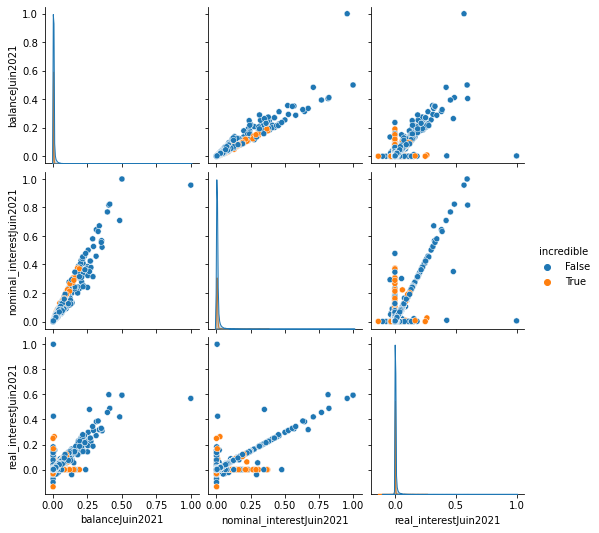

In [21]:
# Create a column with boolean values for incredibility
data['incredible'] = data['nhomno_xhtdJuin2021'] >= 3
data.drop(['nhomno_xhtdJuin2021'], axis='columns', inplace=True)

# Pairplots for continuous variables ranging from 0 to 1
sns.pairplot(data=data[['balanceJuin2021', 'nominal_interestJuin2021'
                        , 'real_interestJuin2021', 'incredible']]
             , hue='incredible')

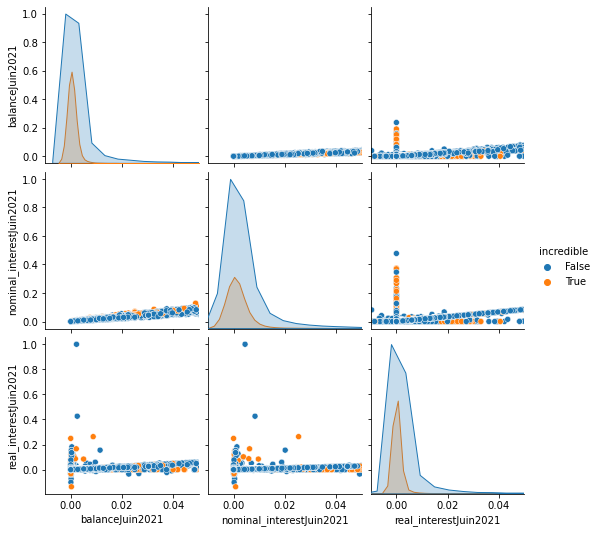

In [22]:
# A closer look (setting the limit of the x axis to reach 0.05 only)

sns.pairplot(data=data[['balanceJuin2021', 'nominal_interestJuin2021'
                        , 'real_interestJuin2021', 'incredible']]
             , hue='incredible').set(xlim=(-0.01,0.05))

Considering both groups with good and bad loans, the observations predominantly concentrated at the value 0.

<AxesSubplot:xlabel='balanceJuin2021', ylabel='Density'>

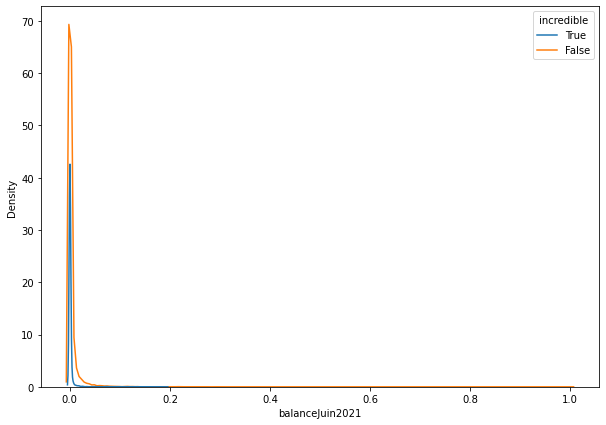

In [23]:
plt.figure(figsize=(10, 7))
sns.kdeplot('balanceJuin2021', hue='incredible'
            , hue_order=[True, False], data=data)

**Good loans in orange, bad loans in blue**
* The balance in June of customers with bad loans ranges from 0 to 0.2. That of customers with good loans ranges all the way to 1.
* Although the number of loans classified as bad only contributes to more than one-fifth of the total number of loans, a signficantly large number of customers with bad loans were observed with the minimum balance (=0).

<AxesSubplot:xlabel='nominal_interestJuin2021', ylabel='Density'>

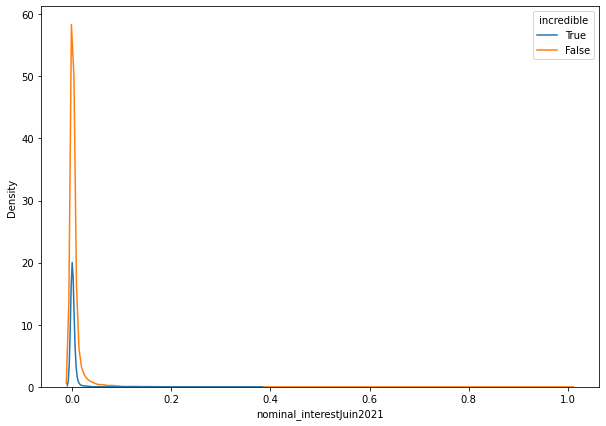

In [24]:
plt.figure(figsize=(10, 7))
sns.kdeplot('nominal_interestJuin2021', hue='incredible'
            , hue_order=[True, False], data=data)

<AxesSubplot:xlabel='real_interestJuin2021', ylabel='Density'>

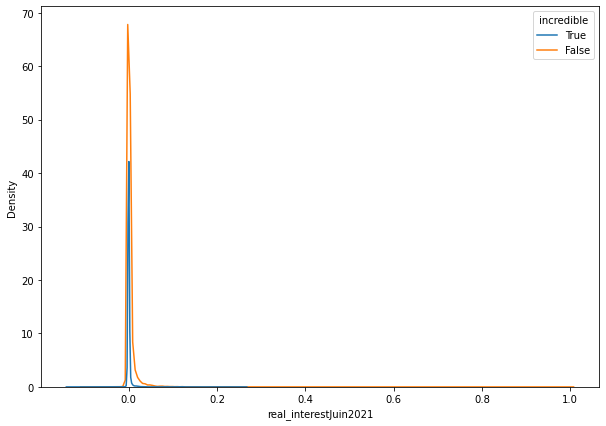

In [25]:
plt.figure(figsize=(10, 7))
sns.kdeplot('real_interestJuin2021', hue='incredible'
            , hue_order=[True, False], data=data)

<AxesSubplot:xlabel='real_interestJuin2021', ylabel='Density'>

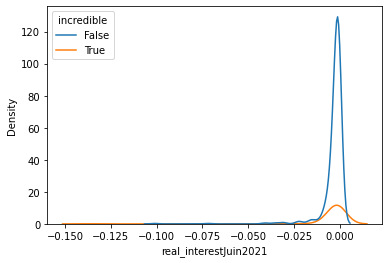

In [26]:
sns.kdeplot(data[data['real_interestJuin2021']<0]['real_interestJuin2021']
            , hue=data['incredible'], hue_order=[False, True])

# Good loans in blue, bad loans in orange

* The nominal interest rate assigned for customers with bad loans ranges from 0 to 0.4. That of customers with good loans ranges all the way to 1.
* The real interest rate for customers with bad loans ranges from -0.15 to around 0.25. That of customers with good loans ranges from -0.1 all the way to 1.

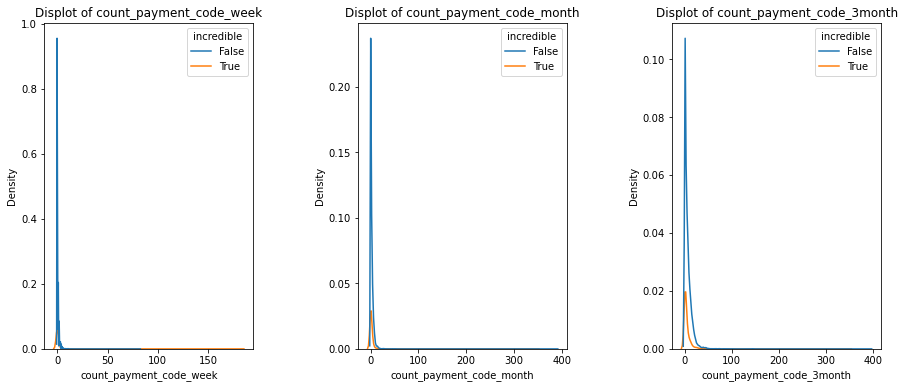

In [27]:
# Distribution of count payment code variables (BEFORE filling missing values)

plt.figure(1, figsize=(15,6))
n=0
for x in ['count_payment_code_week', 'count_payment_code_month', 'count_payment_code_3month']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.kdeplot(data[x], hue=data['incredible'])
    plt.title('Displot of {}'.format(x))
plt.show()

In [28]:
# Filling missing values in count payment code columns
values = {"count_payment_code_week": 0
          , "count_payment_code_month": 0}
# giả định rằng không có record về số dịch vụ sử dụng trong khoảng thời gian cho trước 
# tức là khách hàng đó không sử dụng dịch vự nào
data.fillna(value=values, inplace=True)

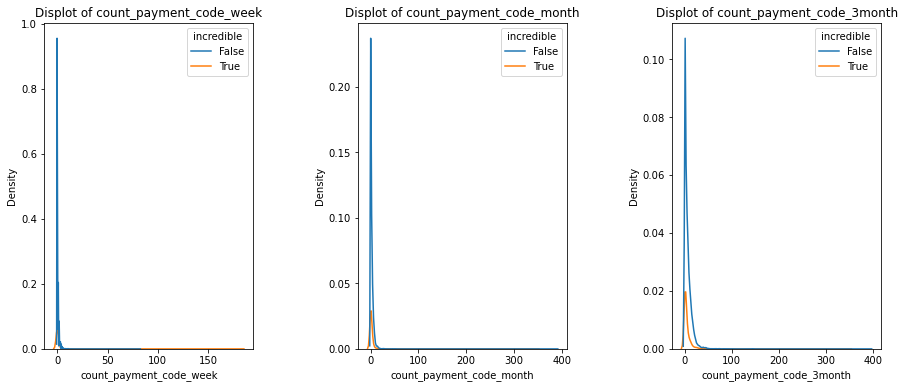

In [29]:
# Distribution of count payment code variables (AFTER filling missing values)
    # không có nhiều thay đổi trong distribution, phần lớn record vẫn mang giá trị 0

plt.figure(1, figsize=(15,6))
n=0
for x in ['count_payment_code_week', 'count_payment_code_month', 'count_payment_code_3month']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.kdeplot(data[x], hue=data['incredible'])
    plt.title('Displot of {}'.format(x))
plt.show()

array([<AxesSubplot:title={'center':'False'}>,
       <AxesSubplot:title={'center':'True'}>], dtype=object)

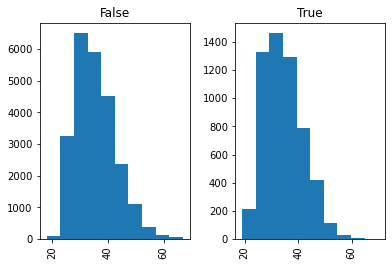

In [30]:
data['age'].hist(by=data['incredible'])

Customers with bad loans are slightly younger, on average, when comparing to customers with good loans.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incredible', ylabel='age'>

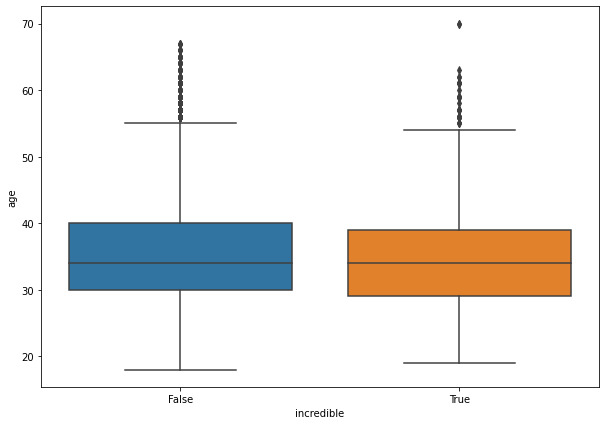

In [31]:
plt.figure(figsize=(10, 7))
sns.boxplot(data['incredible'].astype(str), data['age'])

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


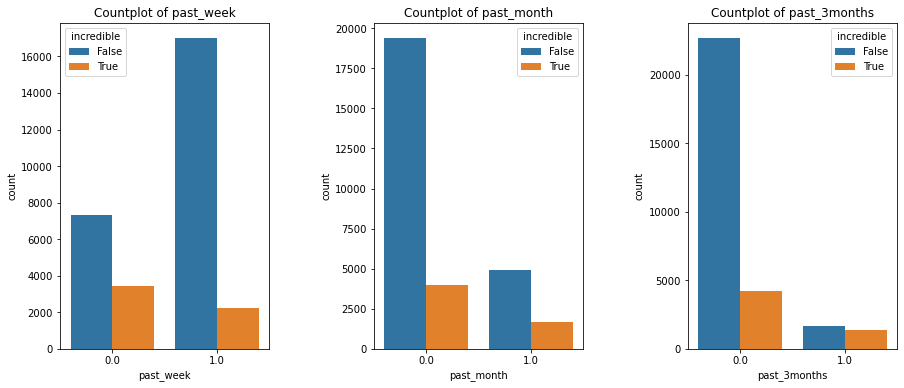

In [32]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['past_week', 'past_month', 'past_3months']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.countplot(data[x], hue=data['incredible'])
    plt.title('Countplot of {}'.format(x))
plt.show()

In the group of customers whose most recent transaction was three months pror to the observation time (December 31, 2020), the default rate is higher. This rate is much lower in the group of customers who had transactions within the last week prior to the time of observation.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


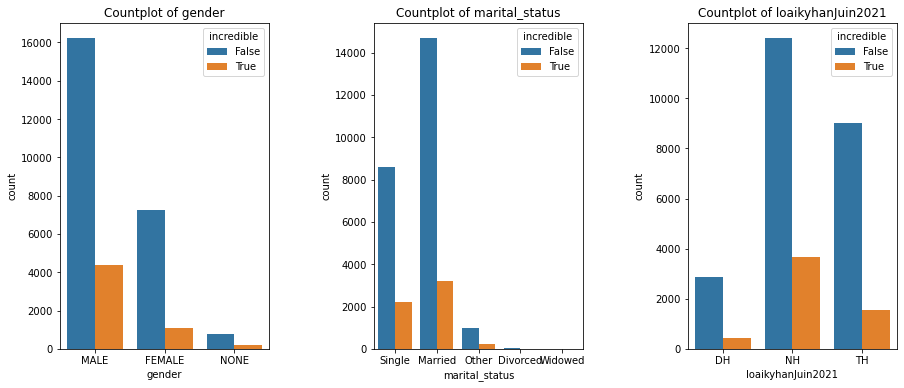

In [33]:
plt.figure(1, figsize=(15,6))
n=0
for x in ['gender', 'marital_status', 'loaikyhanJuin2021']:
    n += 1
    plt.subplot(1, 3, n)
    plt.subplots_adjust(hspace = 0.5, wspace = 0.5)
    sns.countplot(data[x], hue=data['incredible'])
    plt.title('Countplot of {}'.format(x))
plt.show()

* About 25% of male applicants had low credibility, this rate is lower for female applicants, with only about one-seventh of the female applicants having high default risk.
* With approximately one-fifth of the applicants with high default risk, married applicants seem to be less risky and more creditworthy. This may be because of their responsibility to their spouses and families as compared to single applicants. Another factor may be of dual income.
* Long-term and medium-term loans also have a much lower uncreditworthy rate than short-term loans.

## Encoding

In [34]:
data.head()

,gender,marital_status,count_payment_code_week,count_payment_code_month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,loaikyhanJuin2021,age,past_week,past_month,past_3months,incredible
1,MALE,Single,0.0,0.0,0,0.003666,0.006953,0.004128,DH,35.0,0.0,1.0,0.0,False
7,MALE,Married,0.0,0.0,2,0.000139,0.000456,0.000000,NH,29.0,1.0,0.0,0.0,False
11,MALE,Married,0.0,1.0,2,0.012917,0.024721,0.014677,DH,34.0,0.0,1.0,0.0,False
12,MALE,Single,0.0,3.0,6,0.000000,0.000000,0.000000,NH,25.0,1.0,0.0,0.0,False
14,MALE,Married,0.0,0.0,0,0.026599,0.049072,0.029538,DH,48.0,0.0,0.0,1.0,False


In [35]:
data2 = pd.get_dummies(data=data, prefix='')
data2.drop(columns=['_FEMALE', '_NONE', '_Married', '_TH'], inplace=True)

data2['incredible'] = data2.incredible.map({True:1, False:0})
data2.head()

,count_payment_code_week,count_payment_code_month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,age,past_week,past_month,past_3months,incredible,_MALE,_Divorced,_Other,_Single,_Widowed,_DH,_NH
1,0.0,0.0,0,0.003666,0.006953,0.004128,35.0,0.0,1.0,0.0,0,1,0,0,1,0,1,0
7,0.0,0.0,2,0.000139,0.000456,0.000000,29.0,1.0,0.0,0.0,0,1,0,0,0,0,0,1
11,0.0,1.0,2,0.012917,0.024721,0.014677,34.0,0.0,1.0,0.0,0,1,0,0,0,0,1,0
12,0.0,3.0,6,0.000000,0.000000,0.000000,25.0,1.0,0.0,0.0,0,1,0,0,1,0,0,1
14,0.0,0.0,0,0.026599,0.049072,0.029538,48.0,0.0,0.0,1.0,0,1,0,0,0,0,1,0


### Point biserial correlation

In [36]:
y = data2['incredible']
df = data2[['age', 'count_payment_code_week', 'count_payment_code_month'
           , 'count_payment_code_3month', 'balanceJuin2021'
           , 'nominal_interestJuin2021', 'real_interestJuin2021']]

corre = []
pval = []

for column in df:
    x=df[column]
    corr, p = stats.pointbiserialr(list(x), list(y))
    corre.append(round(corr,3))
    pval.append(round(p,3))
results = np.array([corre, pval])
corr_table = pd.DataFrame(results
                          , index=['Correlation coefficient', 'P-value']
                          , columns=df.columns)
corr_table

,age,count_payment_code_week,count_payment_code_month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021
Correlation coefficient,-0.031,0.007,-0.021,-0.057,-0.057,-0.047,-0.066
P-value,0.000,0.229,0.000,0.000,0.000,0.000,0.000


### Cramer's V correlation for categorical variables

In [37]:
def cramers_V(var1,var2) :
    # Cross table building
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None))
    # Keeping of the test statistic of the Chi2 test
    stat = chi2_contingency(crosstab)[0]
    # Number of observations
    obs = np.sum(crosstab)
    # Take the minimum value between the columns and the rows of the cross table
    mini = min(crosstab.shape)-1
    return (stat/(obs*mini))

In [38]:
data_cat = data2[['incredible', 'past_week', 'past_month', 'past_3months', '_MALE'
                  , '_Divorced', '_Single', '_Widowed', '_Other', '_DH', '_NH']]

rows = []

for var1 in data_cat:
    col = []
    for var2 in data_cat:
        # Cramer's V test
        cramers = cramers_V(data_cat[var1], data_cat[var2])
        # Keeping of the rounded value of the Cramer's V  
        col.append(round(cramers,3))
    rows.append(col)
cramers_results = np.array(rows)
df = pd.DataFrame(cramers_results, columns=data_cat.columns, index=data_cat.columns)

df

,incredible,past_week,past_month,past_3months,_MALE,_Divorced,_Single,_Widowed,_Other,_DH,_NH
incredible,1.000,0.062,0.008,0.055,0.009,0.00,0.001,0.00,0.000,0.003,0.012
past_week,0.062,1.000,0.508,0.204,0.010,0.00,0.003,0.00,0.001,0.005,0.000
past_month,0.008,0.508,1.000,0.032,0.007,0.00,0.002,0.00,0.001,0.000,0.000
past_3months,0.055,0.204,0.032,1.000,0.002,0.00,0.000,0.00,0.000,0.001,0.000
_MALE,0.009,0.010,0.007,0.002,1.000,0.00,0.001,0.00,0.058,0.004,0.000
_Divorced,0.000,0.000,0.000,0.000,0.000,0.96,0.000,0.00,0.000,0.000,0.000
_Single,0.001,0.003,0.002,0.000,0.001,0.00,1.000,0.00,0.024,0.006,0.010
_Widowed,0.000,0.000,0.000,0.000,0.000,0.00,0.000,0.84,0.000,0.000,0.000
_Other,0.000,0.001,0.001,0.000,0.058,0.00,0.024,0.00,0.999,0.000,0.002
_DH,0.003,0.005,0.000,0.001,0.004,0.00,0.006,0.00,0.000,1.000,0.144


C:\Users\Dell\AppData\Local\Temp/ipykernel_2712/2730532862.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.zeros_like(df, dtype=np.bool)


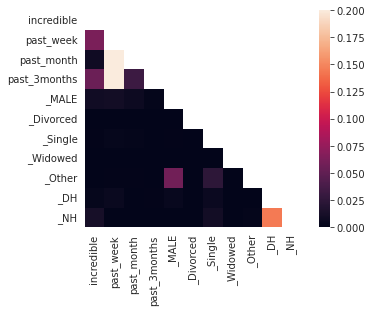

In [39]:
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):
    ax = sns.heatmap(df, mask=mask,vmin=0., vmax=0.2, square=True)

plt.show()

<div class="alert alert-info" style="margin-top: 20px">

The data is ***imbalance***, a random split can result in the training set not having any uncredible debts. The data is splitted with **STRATIFICATION**.

C:\Users\Dell\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='incredible', ylabel='count'>

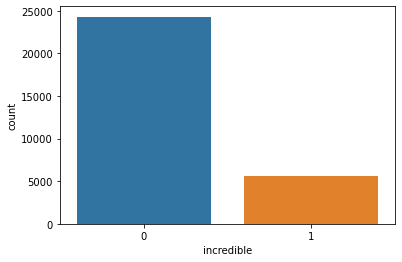

In [40]:
sns.countplot('incredible', data=data2)

## Modeling

### Scaling

In [41]:
col_to_scale = ['age', 'count_payment_code_month'
                , 'count_payment_code_week', 'count_payment_code_3month']

scaler = MinMaxScaler()

data2[col_to_scale] = scaler.fit_transform(data2[col_to_scale])
data2.head(10)

,count_payment_code_week,count_payment_code_month,count_payment_code_3month,balanceJuin2021,nominal_interestJuin2021,real_interestJuin2021,age,past_week,past_month,past_3months,incredible,_MALE,_Divorced,_Other,_Single,_Widowed,_DH,_NH
1,0.000000,0.000000,0.000000,0.003666,0.006953,0.004128,0.326923,0.0,1.0,0.0,0,1,0,0,1,0,1,0
7,0.000000,0.000000,0.005076,0.000139,0.000456,0.000000,0.211538,1.0,0.0,0.0,0,1,0,0,0,0,0,1
11,0.000000,0.002564,0.005076,0.012917,0.024721,0.014677,0.307692,0.0,1.0,0.0,0,1,0,0,0,0,1,0
12,0.000000,0.007692,0.015228,0.000000,0.000000,0.000000,0.134615,1.0,0.0,0.0,0,1,0,0,1,0,0,1
14,0.000000,0.000000,0.000000,0.026599,0.049072,0.029538,0.576923,0.0,0.0,1.0,0,1,0,0,0,0,1,0
16,0.000000,0.005128,0.010152,0.003510,0.007970,0.004731,0.538462,0.0,1.0,0.0,0,1,0,0,0,0,0,0
30,0.000000,0.002564,0.007614,0.014085,0.026957,0.016004,0.307692,0.0,1.0,0.0,0,1,0,0,1,0,1,0
31,0.000000,0.000000,0.000000,0.075000,0.084053,0.049902,0.576923,0.0,1.0,0.0,0,0,0,0,1,0,0,1
37,0.005495,0.010256,0.022843,0.000000,0.000000,0.000123,0.230769,1.0,0.0,0.0,0,1,0,0,0,0,0,0
48,0.000000,0.000000,0.002538,0.003578,0.008093,0.004805,0.153846,0.0,1.0,0.0,0,1,0,0,1,0,0,0


## Splitting data into training and test sets

In [42]:
X = data2.drop(columns=['incredible'])
y = data2['incredible']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2
                                                    , stratify=y, random_state=234)

In [44]:
y_train.value_counts(normalize=True)

0    0.81105
1    0.18895
Name: incredible, dtype: float64

In [45]:
y_test.value_counts(normalize=True)

0    0.811081
1    0.188919
Name: incredible, dtype: float64

## Modeling

### Decision Tree Classification

In [46]:
dec_tree = DecisionTreeClassifier()

criterion = ['gini', 'entropy']
splitter = ['best', 'random']
max_depth = list(2 * np.array(range(1,40)))
parameters = dict(criterion=criterion, splitter=splitter, max_depth=max_depth)

gs = GridSearchCV(dec_tree, parameters, scoring='recall')
gs.fit(X_train, y_train)

print('Best criterion:', gs.best_estimator_.get_params()['criterion'])
print('Best splitter:', gs.best_estimator_.get_params()['splitter'])
print('Best max_depth:', gs.best_estimator_.get_params()['max_depth'])

Best criterion: gini
Best splitter: best
Best max_depth: 44


In [47]:
dec_tree = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=44)

dec_tree.fit(X_train,y_train)

y_treepred = dec_tree.predict(X_test)

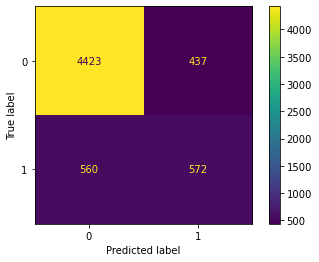

Confusion Matrix


In [48]:
plot_confusion_matrix(dec_tree, X_test, y_test, values_format = 'd')
plt.show()  
print('Confusion Matrix')

In [49]:
dec_trainr2 = round(dec_tree.score(X_train, y_train), 3)
dec_mse = round(mean_squared_error(y_test, y_treepred), 3)
dec_ac = round(accuracy_score(y_test, y_treepred), 3)
dec_prec = round(precision_score(y_test, y_treepred), 3)
dec_rec = round(recall_score(y_test, y_treepred), 3)
dec_f1 = round(f1_score(y_test, y_treepred), 3)

print('Results')
dec_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [dec_trainr2, dec_mse, dec_ac, dec_prec, dec_rec, dec_f1]}
)
dec_results

Results


,Values
R-squared on the training set,0.959
Mean squared error,0.166
Accuracy score,0.834
Precision score,0.567
Recall score,0.505
F1 score,0.534


### k-Nearest Neighbors Classifier using Manhattan distance

Optimal k: 1
Maximum recall score: 0.5901060070671378


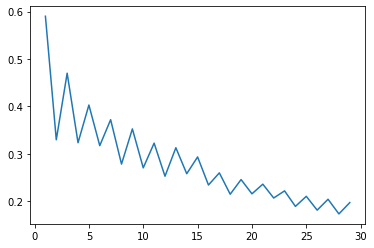

In [51]:
# Calculate recall scores corresponding to k
recall_scores = {}
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 1)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    recall_scores[i] = recall_score(y_test, y_pred)
    
# Plot recall scores
plt.plot(list(recall_scores.keys()),list(recall_scores.values()))
optimal_k = max(recall_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))
print('Maximum recall score: {}'.format(max(recall_scores.values())))

In [52]:
# Run the model with Mahattan distance and k = 1.
# Set the algorith at its default of 'auto' for the model to choose the algorithm that performs best on the dataset.

knn1 = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 1)
knn1.fit(X_train, y_train)

# Predict on the test set
y_knn1pred = knn1.predict(X_test)

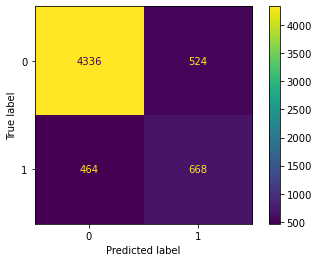

Confusion Matrix


In [53]:
plot_confusion_matrix(knn1, X_test, y_test, values_format = 'd')
plt.show()  
print('Confusion Matrix')

In [65]:
knn1_trainr2 = round(knn1.score(X_train, y_train), 3)
knn1_mse = round(mean_squared_error(y_test, y_knn1pred), 3)
knn1_ac = round(accuracy_score(y_test, y_knn1pred), 3)
knn1_prec = round(precision_score(y_test, y_knn1pred), 3)
knn1_rec = round(recall_score(y_test, y_knn1pred), 3)
knn1_f1 = round(f1_score(y_test, y_knn1pred), 3)

knn1_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [knn1_trainr2, knn1_mse, knn1_ac, knn1_prec, knn1_rec, knn1_f1]}
)
knn1_results

,Values
R-squared on the training set,0.949
Mean squared error,0.165
Accuracy score,0.835
Precision score,0.560
Recall score,0.590
F1 score,0.575


### k-NN Classifier using Euclidean distance

Optimal k: 1
Maximum recall score: 0.5742049469964664


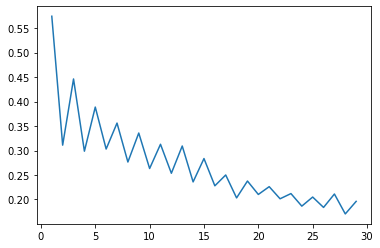

In [50]:
# Calculate recall scores corresponding to k
recall_scores = {}
for i in range(1,30):
    knn = KNeighborsClassifier(n_neighbors=i, metric = 'minkowski', p = 2)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    recall_scores[i] = recall_score(y_test, y_pred)
    
# Plot recall scores
plt.plot(list(recall_scores.keys()),list(recall_scores.values()))
optimal_k = max(recall_scores.items(), key = lambda k : k[1])
print('Optimal k: {}'.format(optimal_k[0]))
print('Maximum recall score: {}'.format(max(recall_scores.values())))

In [55]:
# Run the model with k = 1

knn2 = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
knn2.fit(X_train, y_train)

# Predict on the test set
y_knn2pred = knn2.predict(X_test)

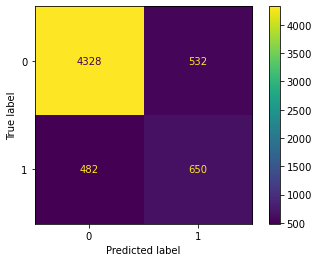

Confusion Matrix


In [56]:
plot_confusion_matrix(knn2, X_test, y_test, values_format = 'd')
plt.show()
print('Confusion Matrix')

In [66]:
knn2_trainr2 = round(knn2.score(X_train, y_train), 3)
knn2_mse = round(mean_squared_error(y_test, y_knn2pred), 3)
knn2_ac = round(accuracy_score(y_test, y_knn2pred), 3)
knn2_prec = round(precision_score(y_test, y_knn2pred), 3)
knn2_rec = round(recall_score(y_test, y_knn2pred), 3)
knn2_f1 = round(f1_score(y_test, y_knn2pred), 3)

knn2_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [knn2_trainr2, knn2_mse, knn2_ac, knn2_prec, knn2_rec, knn2_f1]}
)
knn2_results

,Values
R-squared on the training set,0.949
Mean squared error,0.169
Accuracy score,0.831
Precision score,0.550
Recall score,0.574
F1 score,0.562


### Logistic Regression

#### Check for multicollinearity among explanatory variables

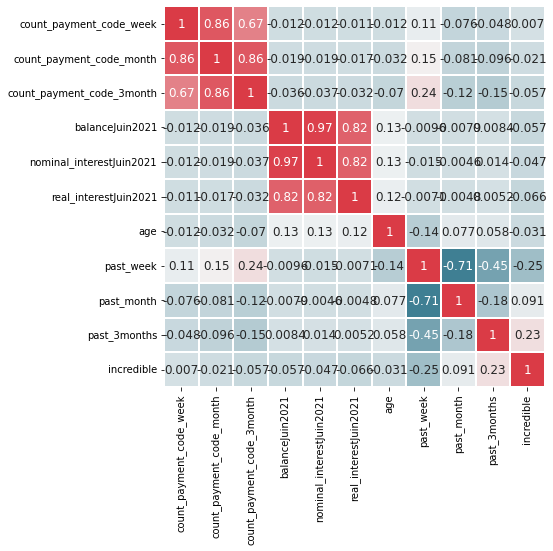

In [58]:
# Correlation check for continuous variables

fig, ax = plt.subplots(figsize=(10, 7))
sns.heatmap(
        data.corr(), 
        cmap = sns.diverging_palette(220, 10, as_cmap = True),
        square=True, 
        cbar=False,
        ax=ax,
        annot=True, 
        linewidths=0.1,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12})
plt.show()

In [59]:
X1 = data2.drop(columns='incredible')

vif = pd.DataFrame()
vif['variable'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif

,variable,VIF
0,count_payment_code_week,4.427929
1,count_payment_code_month,10.174251
2,count_payment_code_3month,5.806546
3,balanceJuin2021,17.537746
4,nominal_interestJuin2021,18.416752
5,real_interestJuin2021,3.289046
6,age,6.143897
7,past_week,6.663695
8,past_month,3.093460
9,past_3months,1.988571


Strong correlation exhibit between the 3 groups of variables:
* variables representing the number of services used by customers in the previous week, a month and three months from December 31, 2020 - the `count_payment_code` variables (correlation greater than 0.8)
* variables indicating customer's balance in June, as well as the nominal and real interest rates (correlation greater than 0.8)
* variables identifying the customer's most recent transaction - `past_week` and `past_month` (correlation greater than 0.7)

<br>This resulted in high VIF values for the corresponding variables. To that end, we decided to discard some of the variables in order to avoid multicollinearity. The variables to be discarded are: `count_payment_code_month`, `nominal_interestJuin2021`, and `past_week`.

In [60]:
X1 = data2.drop(columns=['incredible', 'count_payment_code_month'
               , 'nominal_interestJuin2021', 'past_week'])

vif = pd.DataFrame()
vif['variable'] = X1.columns
vif['VIF'] = [variance_inflation_factor(X1.values, i) for i in range(X1.shape[1])]
vif

,variable,VIF
0,count_payment_code_week,1.825968
1,count_payment_code_3month,2.281685
2,balanceJuin2021,3.189845
3,real_interestJuin2021,3.134501
4,age,3.875217
5,past_month,1.369847
6,past_3months,1.199800
7,_MALE,2.951654
8,_Divorced,1.002636
9,_Other,1.094393


The VIF values for all variables are lower than 5, indicating that there is no significant multicollinearity between the explanatory variables.

#### Check for the independence of observations

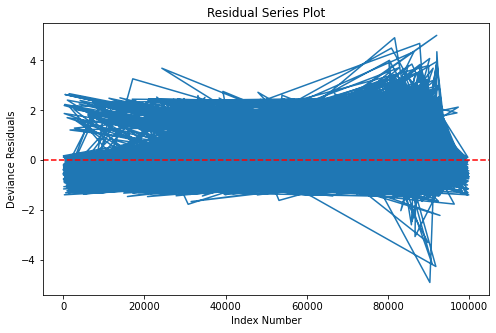

In [61]:
# Setup logistic regression model using GLM method so that we can retrieve residuals
logit_results = GLM(y_train, X_train, family=families.Binomial()).fit()

# Setup plot 
fig = plt.figure(figsize=(8,5))
ax = fig.add_subplot(111, title="Residual Series Plot",
                     xlabel="Index Number", 
                     ylabel="Deviance Residuals")

# Generate residual series plot using standardized deviance residuals
ax.plot(X_train.index.tolist(), stats.zscore(logit_results.resid_deviance))

# Draw horizontal line at y=0
plt.axhline(y = 0, ls="--", color='red');

Since the residuals in the plot above appear to be randomly scattered around the centerline of zero, we can infer that the assumption of independent observations is satisfied.

#### Declare a new set of explanatory for the logistic regression model

In [62]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y, test_size=0.2
                                                        , stratify=y, random_state=234)

#### Apply the model

In [63]:
poly = PolynomialFeatures(degree=2, include_bias=False)

X_train_pr = poly.fit_transform(X1_train)
X_test_pr = poly.fit_transform(X1_test)

In [64]:
log = LogisticRegression(max_iter=1000000)

C = np.logspace(-5, 8, 15)
parameters = dict(C=C)

gs1 = GridSearchCV(log, parameters, scoring='recall')
gs1.fit(X_train_pr, y1_train)

print('Best C:', gs1.best_estimator_.get_params()['C'])

Best C: 100000000.0


In [67]:
log = LogisticRegression(C=100000000, max_iter=100000)
log.fit(X_train_pr, y1_train)
y_logpred = log.predict(X_test_pr)

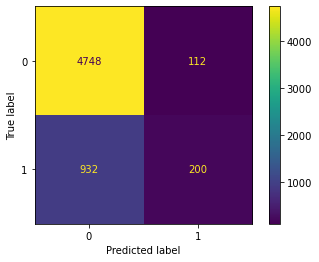

Confusion Matrix


In [68]:
plot_confusion_matrix(log, X_test_pr, y1_test, values_format = 'd')
plt.show()
print('Confusion Matrix')

In [69]:
log_trainr2 = round(log.score(X_train_pr, y1_train), 3)
log_mse = round(mean_squared_error(y1_test, y_logpred), 3)
log_ac = round(accuracy_score(y1_test, y_logpred), 3)
log_prec = round(precision_score(y1_test, y_logpred), 3)
log_rec = round(recall_score(y1_test, y_logpred), 3)
log_f1 = round(f1_score(y1_test, y_logpred), 3)

log_results = pd.DataFrame(
    index=['R-squared on the training set', 'Mean squared error', 'Accuracy score'
           , 'Precision score', 'Recall score', 'F1 score']
    , data={'Values': [log_trainr2, log_mse, log_ac, log_prec, log_rec, log_f1]}
)
log_results

,Values
R-squared on the training set,0.822
Mean squared error,0.174
Accuracy score,0.826
Precision score,0.641
Recall score,0.177
F1 score,0.277


### Model Evaluation

In [71]:
res = pd.concat([dec_results, knn1_results, knn2_results, log_results]
               , keys=['Decision Tree Classifier', 'k-NN Classifier - Manhattan distance'
                      , 'k-NN Classifier - Euclidean distance', 'Logistic Regression']
               , names=['Models', 'Criteria'])

res_ = pd.pivot_table(res, values='Values', index=['Models'], columns=['Criteria'])
res_

Criteria,Accuracy score,F1 score,Mean squared error,Precision score,R-squared on the training set,Recall score
Models,,,,,,
Decision Tree Classifier,0.834,0.534,0.166,0.567,0.959,0.505
k-NN Classifier - Manhattan distance,0.835,0.575,0.165,0.560,0.949,0.590
k-NN Classifier - Euclidean distance,0.831,0.562,0.169,0.550,0.949,0.574
Logistic Regression,0.826,0.277,0.174,0.641,0.822,0.177
